In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
#Ziel: Vorhersage, ob der Patient ein Risiko hat an koronare Herzkrankheit zu erkranken. Zielvariable ist TenYearCHD.

In [2]:
train = pd.read_csv('https://storage.googleapis.com/ml-service-repository-datastorage/Risk_prediction_of_heart_disease_data.csv')
#Quelle: https://www.kaggle.com/amanajmera1/framingham-heart-study-dataset

In [3]:
train.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [4]:
train.describe(include='all')

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,4240.000000,4240.000000,4135.000000,4240.000000,4211.000000,4187.000000,4240.000000,4240.000000,4240.000000,4190.000000,4240.000000,4240.000000,4221.000000,4239.000000,3852.000000,4240.000000
mean,0.429245,49.580189,1.979444,0.494104,9.005937,0.029615,0.005896,0.310613,0.025708,236.699523,132.354599,82.897759,25.800801,75.878981,81.963655,0.151887
std,0.495027,8.572942,1.019791,0.500024,11.922462,0.169544,0.076569,0.462799,0.158280,44.591284,22.033300,11.910394,4.079840,12.025348,23.954335,0.358953
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000
25%,0.000000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.070000,68.000000,71.000000,0.000000
50%,0.000000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.400000,75.000000,78.000000,0.000000
75%,1.000000,56.000000,3.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,263.000000,144.000000,90.000000,28.040000,83.000000,87.000000,0.000000
max,1.000000,70.000000,4.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4240 entries, 0 to 4239
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4240 non-null   int64  
 1   age              4240 non-null   int64  
 2   education        4135 non-null   float64
 3   currentSmoker    4240 non-null   int64  
 4   cigsPerDay       4211 non-null   float64
 5   BPMeds           4187 non-null   float64
 6   prevalentStroke  4240 non-null   int64  
 7   prevalentHyp     4240 non-null   int64  
 8   diabetes         4240 non-null   int64  
 9   totChol          4190 non-null   float64
 10  sysBP            4240 non-null   float64
 11  diaBP            4240 non-null   float64
 12  BMI              4221 non-null   float64
 13  heartRate        4239 non-null   float64
 14  glucose          3852 non-null   float64
 15  TenYearCHD       4240 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 530.1 KB


In [6]:
train_missingValues = train.isna()
train_missingValues.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [7]:
train_missingValues.sum()

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

<AxesSubplot:>

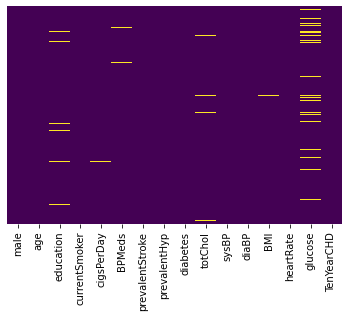

In [8]:
sns.heatmap(train.isnull(),yticklabels=False, cbar=False, cmap='viridis')
# Die Daten zeigen, dass es nur wenige Zeilen gibt, die keinen Wert haben 

<AxesSubplot:>

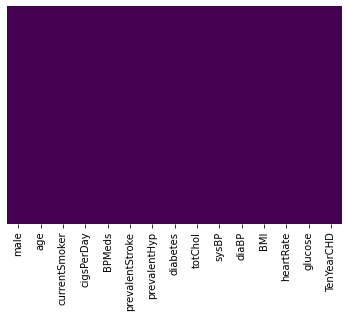

In [9]:
# Wir löschen alle Zeilen mit den fehlenden Werten und die Spalte die für die Auswertung nicht relevant ist oder nicht benötigt wird
train = train.drop('education', axis=1)
train = train.dropna(axis=0)
sns.heatmap(train.isnull(),yticklabels=False, cbar=False, cmap='viridis')

In [10]:
train[train.duplicated(keep=False)] #keine Duplikate vorhanden 

,male,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD


In [11]:
###  Explorative Datenanalyse

In [12]:
train.columns

Index(['male', 'age', 'currentSmoker', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

In [13]:
train.TenYearCHD.value_counts()

0    3179
1     572
Name: TenYearCHD, dtype: int64

<AxesSubplot:xlabel='TenYearCHD', ylabel='count'>

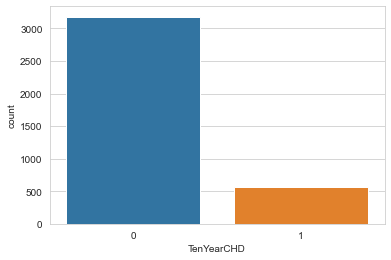

In [14]:
sns.set_style('whitegrid')
sns.countplot(x='TenYearCHD', data=train)

In [15]:
#import cufflinks as cf
#import plotly.offline
#cf.go_offline()
#cf.set_config_file(offline=False, world_readable=True)

In [16]:
#TenYearCHD_male = train[train['male']==1]['TenYearCHD'].value_counts()
#TenYearCHD_female = train[train['male']==0]['TenYearCHD'].value_counts()
#df1 = pd.DataFrame([TenYearCHD_male,TenYearCHD_female])
#df1.index = ['Male','Female']
#df1.iplot(kind='bar',barmode='stack')

In [17]:
#df1 =train.melt(var_name='male', value_name='TenYearCHD')
#pd.crosstab(index=df1['TenYearCHD'], columns=df1['male'])

<AxesSubplot:xlabel='TenYearCHD', ylabel='count'>

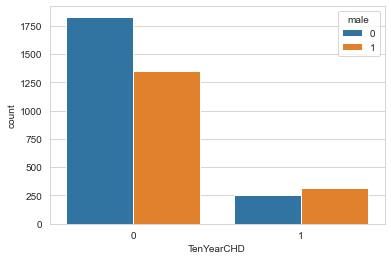

In [18]:
sns.set_style('whitegrid')
sns.countplot(x='TenYearCHD', hue='male', data=train)
#  kein 10-Jahres Risiko und weiblich = 1828
#  kein 10 Jahres Risko und männlich = 1351
#  10-Jahres Risiko und weiblich = 253
#  10 Jahres Risko und männlich  = 319

C:\Users\eebal\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='age', ylabel='Density'>

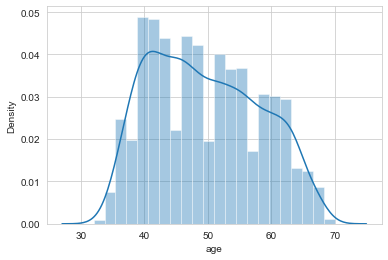

In [19]:
sns.distplot(train['age'])

<AxesSubplot:xlabel='age', ylabel='count'>

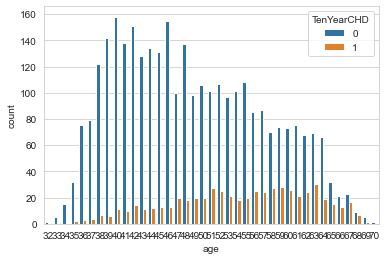

In [20]:
 sns.countplot(x=train['age'], hue=train['TenYearCHD'], data=train)

<AxesSubplot:xlabel='count', ylabel='cigsPerDay'>

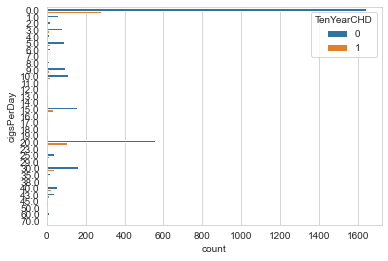

In [21]:
 sns.countplot(y=train['cigsPerDay'], hue=train['TenYearCHD'], data=train)

<AxesSubplot:xlabel='TenYearCHD', ylabel='count'>

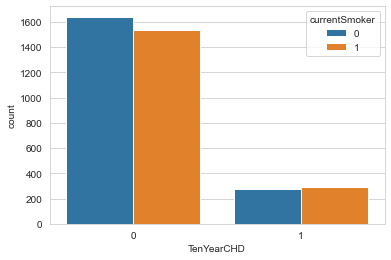

In [22]:
sns.set_style('whitegrid')
sns.countplot(x='TenYearCHD', hue='currentSmoker', data=train)

<AxesSubplot:xlabel='TenYearCHD', ylabel='count'>

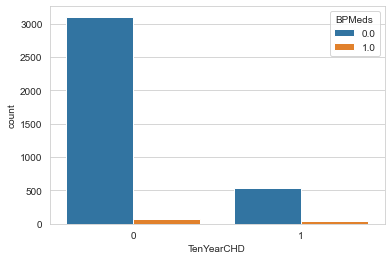

In [23]:
sns.set_style('whitegrid')
sns.countplot(x='TenYearCHD', hue='BPMeds', data=train)

In [24]:
#sns.set_style('whitegrid')
#sns.countplot(x='TenYearCHD', hue='prevalentStroke', data=train)

<AxesSubplot:xlabel='TenYearCHD', ylabel='count'>

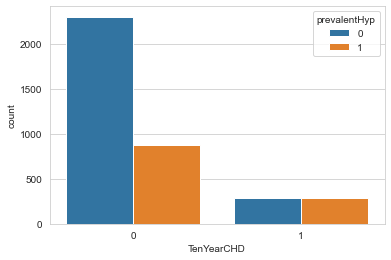

In [25]:
sns.set_style('whitegrid')
sns.countplot(x='TenYearCHD', hue='prevalentHyp', data=train)

<AxesSubplot:xlabel='TenYearCHD', ylabel='count'>

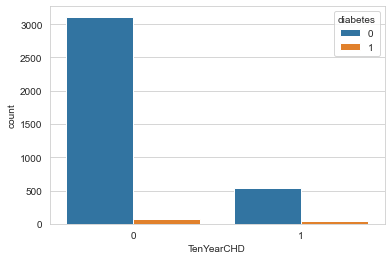

In [26]:
sns.set_style('whitegrid')
sns.countplot(x='TenYearCHD', hue='diabetes', data=train)

### Outliers

C:\Users\eebal\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='totChol', ylabel='Density'>

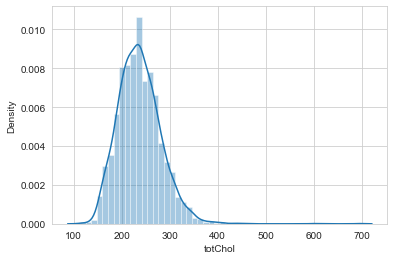

In [27]:
sns.distplot(train['totChol'])

<AxesSubplot:xlabel='TenYearCHD', ylabel='totChol'>

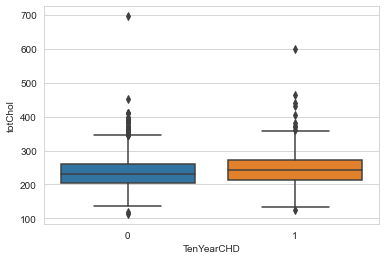

In [28]:
sns.boxplot(y=train['totChol'], x=train['TenYearCHD'])

In [29]:
q_totChol = train['totChol'].quantile(0.99)
q_totChol

352.0

In [30]:
train = train[train['totChol']<q_totChol]

C:\Users\eebal\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='sysBP', ylabel='Density'>

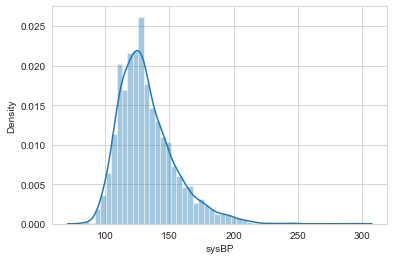

In [31]:
sns.distplot(train['sysBP'])

<AxesSubplot:xlabel='TenYearCHD', ylabel='sysBP'>

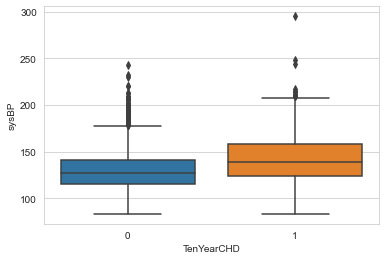

In [32]:
sns.boxplot(y=train['sysBP'], x=train['TenYearCHD'])

In [33]:
q_sysBP = train['sysBP'].quantile(0.99)
q_sysBP

199.95499999999993

In [34]:
train = train[train['sysBP']<q_sysBP]

C:\Users\eebal\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='diaBP', ylabel='Density'>

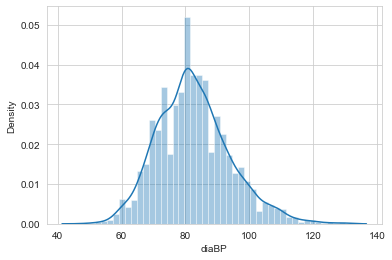

In [35]:
sns.distplot(train['diaBP'])

<AxesSubplot:xlabel='TenYearCHD', ylabel='diaBP'>

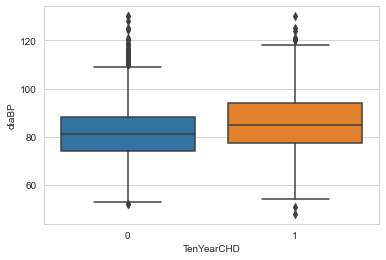

In [36]:
sns.boxplot(y=train['diaBP'], x=train['TenYearCHD'])

In [37]:
q_diaBP = train['diaBP'].quantile(0.99)
q_diaBP

113.28999999999996

In [38]:
train = train[train['diaBP']<q_diaBP]

C:\Users\eebal\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='BMI', ylabel='Density'>

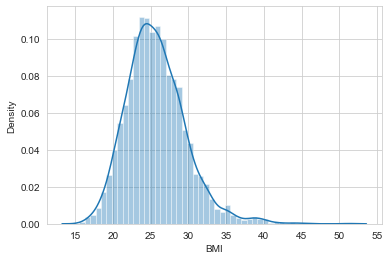

In [39]:
sns.distplot(train['BMI'])

<AxesSubplot:ylabel='BMI'>

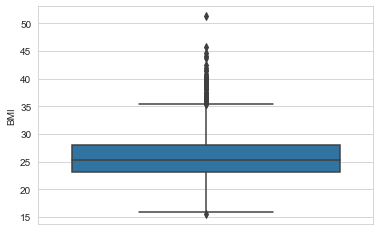

In [40]:
#sns.boxplot(y=train['BMI'], x=train['TenYearCHD'])
sns.boxplot(y=train['BMI'])

In [41]:
q_BMI = train['BMI'].quantile(0.99)
q_BMI

38.262399999999985

In [42]:
train = train[train['BMI']<q_BMI]

C:\Users\eebal\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='heartRate', ylabel='Density'>

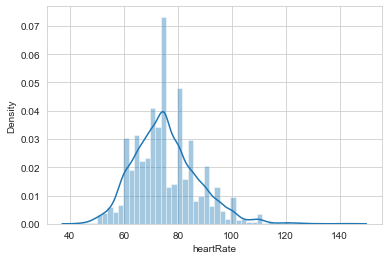

In [43]:
sns.distplot(train['heartRate'])

<AxesSubplot:ylabel='heartRate'>

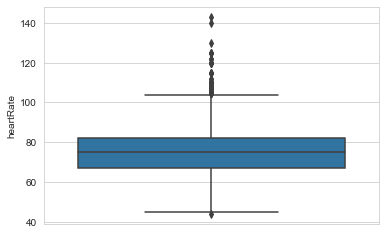

In [44]:
#sns.boxplot(y=train['heartRate'], x=train['TenYearCHD'])
sns.boxplot(y=train['heartRate'])

In [45]:
q_heartRate = train['heartRate'].quantile(0.99)
q_heartRate

110.0

In [46]:
train = train[train['heartRate']<q_heartRate]

C:\Users\eebal\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='glucose', ylabel='Density'>

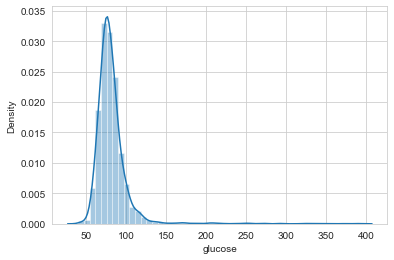

In [47]:
sns.distplot(train['glucose'])

<AxesSubplot:xlabel='glucose'>

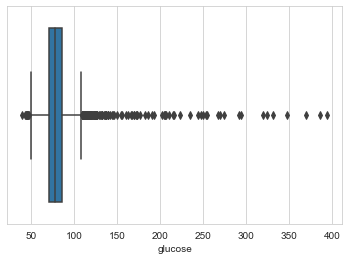

In [48]:
#sns.boxplot(y=train['glucose'], x=train['TenYearCHD'])
sns.boxplot(x=train['glucose'])

In [49]:
q_glucose = train['glucose'].quantile(0.97)
q_glucose

117.0

In [50]:
train = train[train['glucose']<q_glucose]

<AxesSubplot:xlabel='glucose'>

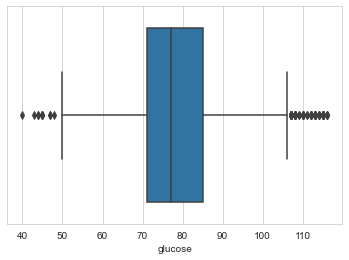

In [51]:
sns.boxplot(x=train['glucose'])

In [52]:
#sns.pairplot(train)

### Checking for Multicollinarity

In [53]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [54]:
# Create a new data frame which includes all VIFs (Variance Inflation Factor)
# Each variable has its own variance inflation factor. This measure is variable specific
variables = train.drop(['TenYearCHD'], axis = 1)
vif = pd.DataFrame()

# Make use of the variance_inflation_factor module, output the respective VIFs 
vif["VIF"] = [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]

# Include variable names so it is easier to explore the result
vif["Features"] = variables.columns

In [55]:
vif

,VIF,Features
0,2.217100,male
1,42.056992,age
2,4.959553,currentSmoker
3,4.287163,cigsPerDay
4,1.118613,BPMeds
5,1.019975,prevalentStroke
6,2.240536,prevalentHyp
7,1.023187,diabetes
8,37.313994,totChol
9,153.968224,sysBP


<AxesSubplot:>

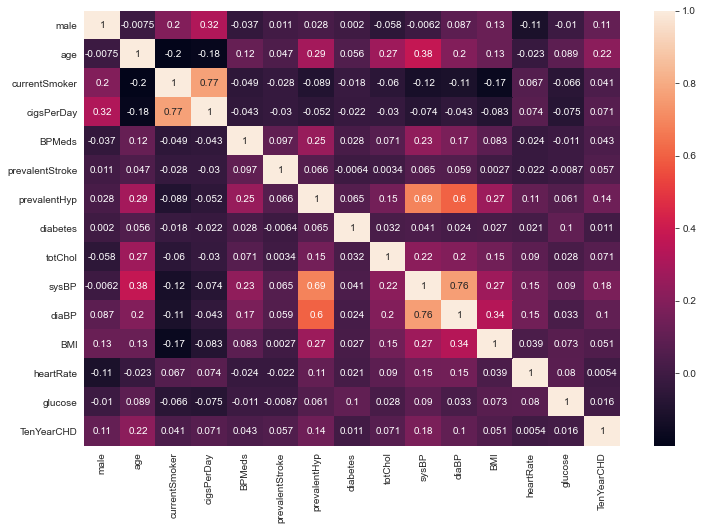

In [56]:
plt.figure(figsize=(12,8))
sns.heatmap(train.corr(), annot=True)
#Korrelationen zwischen currentSmoker und cigsPerDay, sysBPund diaBP, prevalentHyp und sysBP und diaBP 

In [57]:
train = train.reset_index(drop=True).copy()

### Modeling

In [58]:
estimators = ['male', 'age', 'currentSmoker', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP', 'BMI', 'heartRate', 'glucose']
X_all = train[estimators]
y = train['TenYearCHD']
#currentSmoker & sysBP werden gedropt (siehe oben)

In [59]:
import statsmodels.api as sm

In [60]:
x = sm.add_constant(X_all)
reg_logit = sm.Logit(y,x)
results_logit = reg_logit.fit()
results_logit.summary()

Optimization terminated successfully.
         Current function value: 0.356399
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:             TenYearCHD   No. Observations:                 3444
Model:                          Logit   Df Residuals:                     3431
Method:                           MLE   Df Model:                           12
Date:                Sun, 24 Oct 2021   Pseudo R-squ.:                  0.1008
Time:                        19:01:14   Log-Likelihood:                -1227.4
converged:                       True   LL-Null:                       -1365.0
Covariance Type:            nonrobust   LLR p-value:                 7.410e-52
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -8.3986      0.805    -10.431      0.000      -9.977      -6.821
male                0.6638      0.112      5.943      0.000       0.445       0.883
age                 0.0703      0.007     10.266      0.000       0.057       0.084
currentSmoker       0.4561      0.113      4.031      0.000       0.234       0.678
BPMeds             -0.1249      0.293     -0.427      0.670      -0.699       0.449
prevalentStroke     1.0221      0.540      1.892      0.058      -0.037       2.081
prevalentHyp        0.1340      0.150      0.893      0.372      -0.160       0.428
diabetes           -0.0543      0.515     -0.106      0.916      -1.063       0.954
totChol             0.0020      0.001      1.468      0.142      -0.001       0.005
sysBP               0.0138      0.004      3.760      0.000       0.007       0.021
BMI                 0.0029      0.015      0.187      0.852      -0.027       0.033
heartRate       -6.527e-05      0.005     -0.013      0.989      -0.010       0.009
glucose            -0.0009      0.004     -0.196      0.845      -0.009       0.008
===================================================================================
"""

In [61]:
# Der P-Wert bei folgenden Attributen: BPMeds, prevalentStroke, diabetes, totChol,diaBP,BMI,heartRate & glucose
#ist relativ hoch und somit weißt es eine geringe statistiche signifikante Beziehung zur Wahrscheinlichkeit einer Herzerkrankung auf
#(The closer to 0.000 the p-value, the better, Slides_AI - Part 4-2.pdf, S.27)

In [62]:
#Odds ratio & confidence intervals
params = results_logit.params
conf = results_logit.conf_int()
conf['Odds Ratio'] = params
conf.columns = ['5%', '95%', 'Odds Ratio']
print(np.exp(conf))

                       5%       95%  Odds Ratio
const            0.000046  0.001091    0.000225
male             1.560329  2.417551    1.942209
age              1.058495  1.087278    1.072790
currentSmoker    1.264052  1.969618    1.577878
BPMeds           0.497151  1.566804    0.882575
prevalentStroke  0.964058  8.010118    2.778888
prevalentHyp     0.851976  1.534411    1.143364
diabetes         0.345451  2.596858    0.947147
totChol          0.999340  1.004611    1.001972
sysBP            1.006617  1.021175    1.013870
BMI              0.972975  1.033720    1.002888
heartRate        0.990448  1.009513    0.999935
glucose          0.990579  1.007774    0.999140


In [63]:
#x_new = x.drop(['BPMeds', 'prevalentStroke', 'diabetes', 'totChol','diaBP','BMI','heartRate', 'glucose'], axis=1)

In [64]:
#train = train.drop(['BPMeds', 'prevalentStroke', 'diabetes', 'totChol','diaBP','BMI','heartRate', 'glucose'], axis=1)

In [65]:
#x = sm.add_constant(x_new)
#reg_logit = sm.Logit(y,x)
#results_logit = reg_logit.fit()
#results_logit.summary()

In [66]:
#Odds ratio & confidence intervals
#params = results_logit.params
#conf = results_logit.conf_int()
#conf['Odds Ratio'] = params
#conf.columns = ['5%', '95%', 'Odds Ratio']
#print(np.exp(conf))

### Model Training

In [67]:
train.shape

(3444, 15)

In [68]:
X = x
y = y

# Undersampling (nachträglich) 

In [75]:
import imblearn
from imblearn.under_sampling import InstanceHardnessThreshold
from sklearn.linear_model import LogisticRegression

In [76]:
iht = InstanceHardnessThreshold(random_state=0,estimator=LogisticRegression (solver='lbfgs', multi_class='auto'))
                               
X_resampled, y_resampled = iht.fit_resample(X, y)

C:\Users\eebal\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\eebal\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

In [77]:
from sklearn.model_selection import train_test_split

In [78]:
#Methode von train_test_split (sklearn)
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
#der Datensatz wird übergeben ohne die Zielspalte TenYearCHD für X, dafür wird diese in y eingesetzt
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=365)

#### Scaling

In [79]:
from sklearn.preprocessing import StandardScaler

In [80]:
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

### Logistische Regression

In [81]:
from sklearn.linear_model import LogisticRegression

In [82]:
# Ein model wird angelegt
log_model = LogisticRegression(random_state=0)

In [83]:
#Trainiere und fitten einer logistisches Regressionsmodell auf das Trainigsset
log_model.fit(X_train,y_train)

LogisticRegression(random_state=0)

In [84]:
from sklearn.metrics import classification_report

In [85]:
#Precision= True positive / true positive + false positive 
#Recall = True positive / true positive + false negative
#f1-score = zusammenfassung von der precision und dem recall
#accuracy(genauigkeit) liegt bei 0.86 - also 86%
print('train performance')
print(classification_report(y_train, log_model.predict(X_train)))
print('test performance')
print(classification_report(y_test, log_model.predict(X_test)))
#Bei der logistischen Regression sind die Trainings- und Testleistung sehr ähnlich.
# erstellte Modell kann auf neuen Daten gut verallgemeinert werden kann.

train performance
              precision    recall  f1-score   support

           0       0.94      0.99      0.96       365
           1       0.99      0.93      0.96       380

    accuracy                           0.96       745
   macro avg       0.96      0.96      0.96       745
weighted avg       0.97      0.96      0.96       745

test performance
              precision    recall  f1-score   support

           0       0.95      1.00      0.98       101
           1       1.00      0.94      0.97        86

    accuracy                           0.97       187
   macro avg       0.98      0.97      0.97       187
weighted avg       0.97      0.97      0.97       187



In [86]:
#Die Confusion Matrix zeigt eine Zusammenfassung der Vorhersageergebnisse zu dem Klassifizierungsproblem 
from sklearn.metrics import confusion_matrix

In [87]:
print(confusion_matrix(y_test, log_model.predict(X_test)))
#

[[101   0]
 [  5  81]]


### Decision Tree

In [88]:
#from sklearn.tree import DecisionTreeClassifier
# overfitting

In [89]:
#tree = DecisionTreeClassifier()
#tree.fit(X_train, y_train)

In [90]:
#confusion_matrix(y_test, tree.predict(X_test)) #true negatives, false positives, false negatives, true positives

In [91]:
#from sklearn.metrics import classification_report


In [92]:
#print(classification_report(y_train, tree.predict(X_train)))

In [93]:
#print(classification_report(y_test, tree.predict(X_test)))

### Random forest 

In [94]:
#from sklearn.ensemble import RandomForestClassifier
# overfitting

In [95]:
#rf = RandomForestClassifier()
#rf.fit(X_train, y_train)

In [96]:
#confusion_matrix(y_test, rf.predict(X_test))

In [97]:
#print(classification_report(y_train, rf.predict(X_train)))

In [98]:
#print(classification_report(y_test, rf.predict(X_test)))